# Data Analysis




## This started as a typical Exploratory Data Analysis to proced to modelling stage, but finally muted to a complete Data Analysis.

## This Data Analysis still needs to be ordered and cleaned (not to mention the shameful grammar and orthography needs to be corrected). But it is almost  finished.

About the simple EDA, you can find it here:
https://github.com/echestare/001KenJeeFromScratch_DSSalary/releases/tag/v1.0.0-eda

# In this Data Analysis is added a new column: 'count_keywords'

# An outlook of the main conclusions:
### (This Analysis goes deeper than these conclusions, but these are the most important or useful)
### First of all, mention that the average salary for data related professions is USD 101,357	

### There is a clear correlation between the salaries and some factors:
 - **Amount of keywords** data related, mainly `Python, R, Scikit, aws, Spark and Tensor`. As well, seems like `Google Analytics` was a pointer for lower salaries.
 - **RATINGS**: essentially, higher rated companies offer better salaries. Consider that the ratings are established mostly by those who work there.

### Other factors related to better salaries:
 - Info that could be more useful for `candidates`:
   - By **data related profession**: Director, Machine Learning Engineering and **Data Scientist** (This profession has the more offers). 
   - By **seniority**: of course **Senior** has the better salaries and more offers.
   - By **industry**: Other retailed stores and Motion Picture Production & Distribution. Biotech & Pharmaceuticals has more offers but just with mean salaries.
   - By **sector**: Media, Accounting & Legal, Information Technology and Biotech & Pharmaceuticals. Notwithstanding that Media and Accounting & Legal have really few offers, Information Technology and Biotech & Pharmaceuticals have the most.
   - By **type of ownership**: Public companies, Subsidiary or Business Segment or School / School District. But Private companies offer significantly more jobs.
   - By **state** of the job: CA, IL, DC and MA (CA and MA even present the more amount of offers). MA offer more `Science` related jobs though the others have a big demand of data scientist (likely `bussines` related).

 - Info that is `statistically` appreciated:
   - By **Size**: Companies with more than 10,000 employees and their amount of offers are meaningful despite companies with 500 to 5000 employees have yet still offers with the lowest salaries.
   - By **revenue**: 5 to 10 million (USD), 1 to 5 million (USD) and 10+ billion (USD). Notwithstanding that compnanies with a revenue between 1 to 10 million (USD) have really few offers, 10+ billion (USD) revenue companies have the most.

### Stuff not as correlating as expected with salaries:
 - Age of the company, Descriptions length, Keyword Excel and SQL
     
## A final thing to highlight: It is not duly analyzed in this report, but it is clearly presented in the wordcloud; it is ABSOLUTELY important, in all job descriptions, *TEAMWORK*.


 > As a Side Note: Correlation between length of Job descriptions and the amount of keywords mentioned is clear, but it is not strong enough to carry that correlation to Salaries. Thats why the amount of keywords can influence salary values, but  the length description does not. ~ 


In [1]:
# Importing main libraries.
import pandas as pd
import numpy as np
# Basic plot libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# To put two sns.jointplots side by side.
import matplotlib.gridspec as gridspec
# To put wordcloud to work.
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image




# Making cells wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Showing each column of the dataframe.
pd.set_option('display.max_columns', None)

In [2]:
# Charging Data.
df = pd.read_csv("./data_cleaned_2020.csv")
#df1 = pd.read_csv("./data_cleaned_2021.csv")

# Creating a column that contain the amount of keywords metntiones in each Job Description.

In [3]:
list_yn = ['python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn',
       'sas_yn', 'd3js_yn', 'julia_yn', 'jupyter_yn', 'keras_yn', 'matlab_yn',
       'matplotlib_yn', 'pytorch_yn', 'scikit_yn', 'tensor_yn', 'weka_yn',
       'selenium_yn', 'hadoop_yn', 'tableau_yn', 'bi_yn', 'bigml_yn',
       'rapidminer_yn', 'flink_yn', 'datarobot_yn', 'hana_yn', 'mongo_yn',
       'trifacta_yn', 'minitab_yn', 'kafka_yn', 'microstrategy_yn',
       'google_an_yn', 'spss_yn']
df['count_keywords'] = df[list_yn].sum(axis=1)

# ###################################################
# DELETE LINES IN CELLS AHEAD (THE SAME LINES THAN THIS CELL)
# Explain this cell
# ###################################################

# What we have in the dataset?


In [4]:
# Ok, lets see what we have:
df.head(5)

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  data scientist location: albuquerque, nm educa...     3.8   
1  what you will do:  i. general summary  the hea...     3.4   
2  knowbe4, inc. is a high growth information sec...     4.8   
3  *organization and job id** job id: 310709  dir...     3.8   
4  data scientist affinity solutions / marketing ...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  hourly  \
0                                                 -1       0   
1                                                 -1       0   
2                                                 -1       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   employer_provided  min_salary  max_salary  avg_salary  \
0                  0          53          91        72.0   
1                  0          63         112        87.5   
2                  0          80          90        85.0   
3                  0          56          97        76.5   
4                  0          86         143       114.5   

                             company_txt job_state  age  python_yn  R_yn  \
0                      Tecolote Research        NM   48          1     0   
1  University of Maryland Medical System        MD   37          1     1   
2                                KnowBe4        FL   11          1     1   
3                                   PNNL        WA   56          1     0   
4                     Affinity Solutions        NY   23          1     0   

   spark_yn  aws_yn  excel_yn  sql_yn  sas_yn  d3js_yn  julia_yn  jupyter_yn  \
0         0       0         1       0       1        0         0           0   
1         0       0         0       0       0        0         0           0   
2         1       0         1       1       1        1         0           0   
3         0       0         0       0       0        0         0           0   
4         0       0         1       1       1        0         0           0   

   keras_yn  matlab_yn  matplotlib_yn  pytorch_yn  scikit_yn  tensor_yn  \
0         0     

# Quick statistic calculations 
## Calculated in each column from their inside data (not counting rows without data).
#### Rows without data where filled with "-1" (So they must not be considered for statistical calculations. Those lead to wrong results).

In [5]:
# Quick statistical data 
# df.describe()

In [6]:
#Then, append the describe df of numerical data columns:
    #The -1 cells are ignored. Thats why in some counts the number is different
            #-1 cells are those that the info is not supplied by glassdoor

df_describe = pd.DataFrame(df[(df['Rating'] >= 0)][['Rating']].describe())
df_describe['Founded'] = df[(df['Founded'] > 0)]['Founded'].describe()
df_describe['min_salary'] = df['min_salary'].describe()
df_describe['max_salary'] = df['max_salary'].describe()
df_describe['avg_salary'] = df['avg_salary'].describe()
df_describe['age'] = df[(df['age'] > 0)]['age'].describe()
df_describe['desc_len'] = df[(df['desc_len'] > 0)]['desc_len'].describe()
df_describe['desc_len_words'] = df[(df['desc_len_words'] > 0)]['desc_len_words'].describe()
df_describe['count_keywords'] = df['count_keywords'].describe()


df_describe



Rating      Founded  min_salary  max_salary  avg_salary  \
count  731.000000   692.000000  742.000000  742.000000  742.000000   
mean     3.688372  1969.969653   74.656334  128.059299  101.357817   
std      0.570353    54.089762   31.050726   45.353424   37.649580   
min      1.900000  1744.000000   15.000000   16.000000   15.500000   
25%      3.300000  1958.000000   52.000000   96.000000   73.500000   
50%      3.700000  1992.000000   69.500000  124.000000   97.500000   
75%      4.000000  2007.000000   91.000000  155.000000  122.500000   
max      5.000000  2019.000000  202.000000  306.000000  254.000000   

              age      desc_len  desc_len_words  count_keywords  
count  692.000000    742.000000      742.000000      742.000000  
mean    51.030347   3869.545822      551.912399        3.521563  
std     54.089762   1521.495868      220.685001        2.553914  
min      2.000000    407.000000       65.000000        0.000000  
25%     14.000000   2801.000000      396.750000        1.000000  
50%     29.000000   3731.000000      532.500000        3.000000  
75%     63.000000   4740.000000      673.500000        5.000000  
max    277.000000  10051.000000     1631.000000       11.000000

# Companies Rating stats

In [7]:
#Watching Rating values without the -1 values. Bar plot and box plot.

# df[df['Rating'] >= 0]['Rating'].hist()
# plt.show()
# df[df['Rating'] >= 0][['Rating']].boxplot()
# plt.show()


fig = px.histogram(df[df['Rating'] >= 0], x= 'Rating', title='Rating',
                   marginal="box")

fig.show()

# Min, Max, Average Salaries

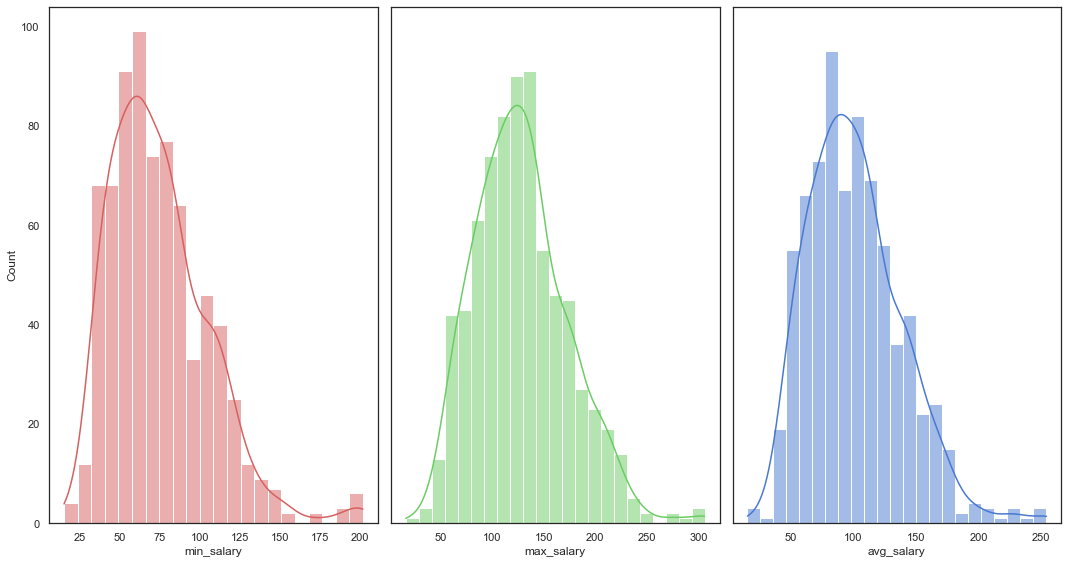

In [8]:
#Comparing average, min and max salary values without losing the sight in the individual graphics

# df.min_salary.hist()
# df.max_salary.hist()
# df.avg_salary.hist()
# df[['avg_salary','min_salary','max_salary']].hist()
# df.boxplot(column= ['min_salary','avg_salary','max_salary'])


fig = px.histogram(df[['min_salary','max_salary','avg_salary']], x= ['min_salary','max_salary','avg_salary'],
                   title='Min, Max, Averages comparison',
                   marginal="box",
                   opacity = 0.8)
fig.update_layout(barmode='overlay')
fig.show()




sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 3, figsize=(15, 8), sharey=True)

# #Plot a histogram and kernel density estimate
sns.histplot(x=df['min_salary'], color="r", kde=True, ax=axes[0])
sns.histplot(x=df['max_salary'], color="g", kde=True, ax=axes[1])
sns.histplot(x=df['avg_salary'], color="b", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()


# # Beautiful bar plot whit the whole dataframe.... But it does not say anything significant
# import plotly.graph_objects as go
# fig = go.Figure()

# fig.add_trace(go.Bar(x=df.index,y=df['min_salary'],name='Minimum salary'))
# fig.add_trace(go.Bar(x=df.index,y=df['max_salary'],name='Maximum Salary'))

# fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')

# fig.show()

# Companies Age Stats

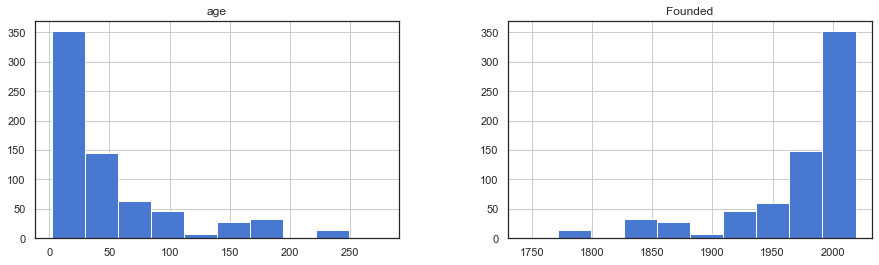

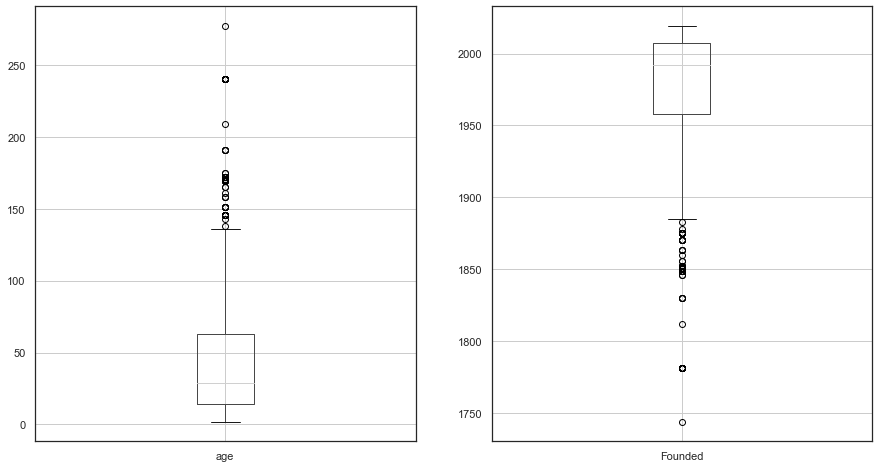

In [9]:
#Here one of the graphics is enough, but I wanted to see both.

df[(df['age'] > 0)&(df['Founded'] > 0)][['age','Founded']].hist(figsize=(15,4))
plt.show()


f, axes = plt.subplots(1, 2, figsize=(15, 8))
df[df['age']>=0][['age']].boxplot(ax=axes[0])
df[df['Founded']>=0][['Founded']].boxplot(ax=axes[1])
plt.show()

# Lenght of Job Description outlook
## By characters.
## By words.

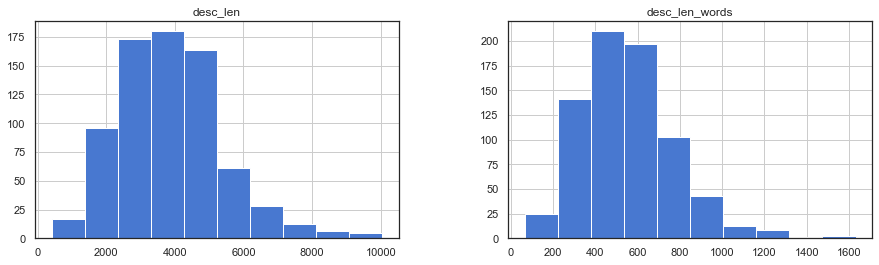

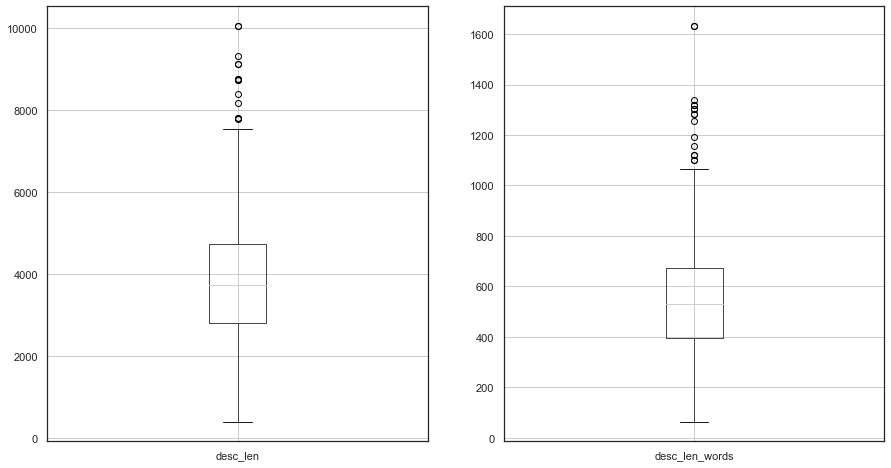

In [10]:
#Watching the distribution in lenght of job description text characterized by quantity of characters and by quantity of words.
df[['desc_len','desc_len_words']].hist(figsize=(15,4))
plt.show()


f, axes = plt.subplots(1, 2, figsize=(15, 8))
df.boxplot(column= ['desc_len'], ax=axes[0])
df.boxplot(column= ['desc_len_words'], ax=axes[1])
plt.show()


# Pearson Correlation 
### Age, Average Salary, Min, Max, Rating, Job Description Lenght (by Characters), Job Description Lenght (by words).

<AxesSubplot:>

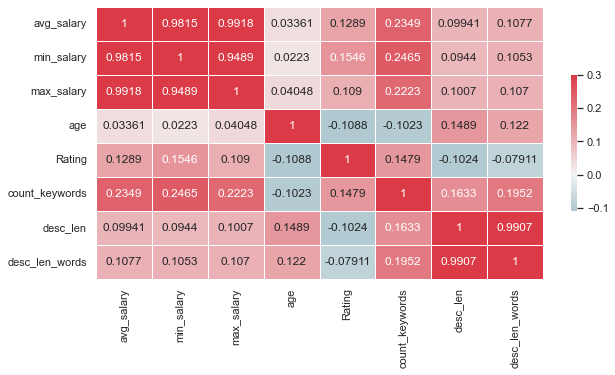

In [11]:
# Pearson Correlation
#there is a correlation between the quantity of keywords and the salary?
# df[['min_salary','max_salary','avg_salary','count_keywords','desc_len']].corr(method ='pearson')
#We can see that a lineal correlation is not a right choice to find a grade of dependency.


# Kendall correlation
# df[['min_salary','max_salary','avg_salary','count_keywords','desc_len']].corr(method ='kendall')
# #Kendall: non-parametric correlation. Is good when your sample size is small and has many tied ranks.
#     #It is a test of strength of dependece (i.e. one could be written as a linear function of the other), whereas Pearson and Spearman are nearly equivalent in the way they correlate normally distributed data.
# #In this case, Kendall is even worse.







#Correlation of Age, Average-Salary, Min-S, Max-S, Rating, Lenght-Descriptions-Char and Lenght-Descriptions-Words

# df[(df['age']>=0) & (df['Rating']>=0)][['age','avg_salary','min_salary','max_salary','Rating','desc_len','desc_len_words']].corr()
#     #I let min and max salary cause I would like to detect some correlation with a bigger salary range and a smaller rank

df_corr = df[(df['age']>=0) & (df['Rating']>=0)][['avg_salary','min_salary','max_salary','age','Rating','count_keywords','desc_len','desc_len_words']].corr()

cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.subplots(figsize=(10,5))
sns.heatmap(
    df_corr, 
    vmax=.3,#vmin=-.3
    center=0,
    cmap=cmap,
#    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True,
    fmt='.4g'
)

In [12]:
df_corr = df[(df['age']>=0) & (df['Rating']>=0)][['avg_salary','Rating','age','desc_len','desc_len_words','count_keywords']].corr()

# List of lists of columns without one column each time.
    # The chart is plotted in abs (not negative)
lists_cols = []
for i in df_corr.columns:
    list_col=[]
    for j in df_corr.columns:
        if j != i:
            list_col.append(j)
    lists_cols.append(list_col)
# Separating df_corr without cells with 1
counter = 0
fig = go.Figure()
for i in df_corr.columns:
    df_corr_line = pd.DataFrame(df_corr.loc[i][lists_cols[counter]])
    counter+=1
#     display(df_corr_line.T)
#     fig = px.line_polar(df_corr_line, r=df_corr_line.columns[0], theta=df_corr_line.index, line_close=True)
#     fig.update_traces(fill='toself')
#     fig.show()
    fig.add_trace(go.Scatterpolar(r=abs(df_corr_line.T.iloc[0]),theta=df_corr_line.index,fill='toself',name=i))
fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 1])),showlegend=True)
fig.show()

# ###################################################
# The variable with highest correlations with the others is the Amount of Keywods: 
##    - count_keywords vs min,max and AVERAGE SALARY    ~ 0.23
##    - count_keywords vs desc_len    ~ 0.18

# Looks like ratings has a slight correlation with each of the other variables.
##    - The minor with lenght description by words.
##    - It is 0,12 for avg_salary
# ###################################################

# Comparing Linear regression (Average Salary vs Job Lenght Descriptions)

In [13]:
# The only function of this class is to plot two jointplots side by side
#Code of: ImportanceOfBeingErnest
    #https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

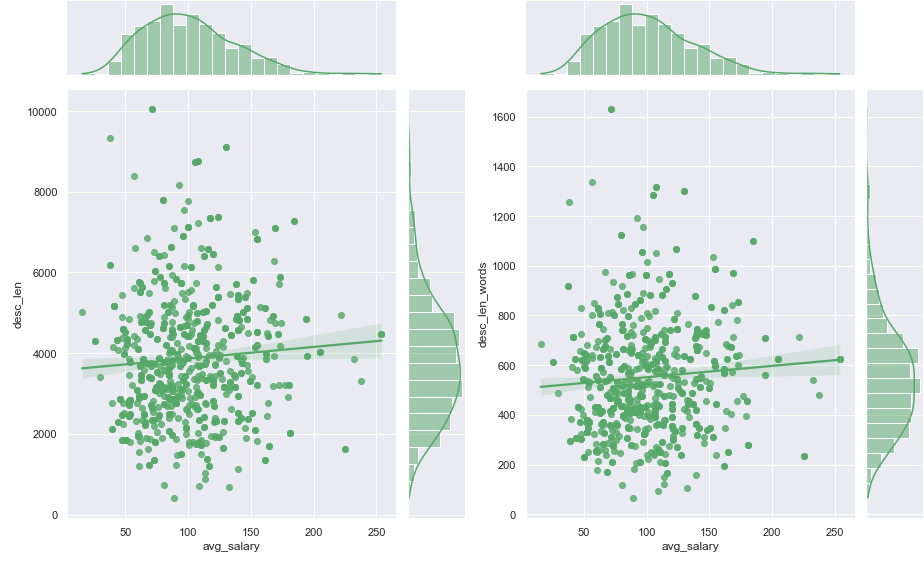

In [14]:
# #Scatter plot avg_salary-desc_len_words and avg_salary-desc_len

# f, axes = plt.subplots(1, 2, figsize=(15, 4))
# df.plot.scatter(x='avg_salary', y='desc_len', ax=axes[0])
# df.plot.scatter(x='avg_salary', y='desc_len_words', ax=axes[1])
# plt.show()



sns.set()
sfg = SeabornFig2Grid

JG1 = sns.jointplot(x=df['avg_salary'], y=df['desc_len'], kind="reg", space=0, color="g")
JG2 = sns.jointplot(x=df['avg_salary'], y=df['desc_len_words'], kind="reg", space=0, color="g")

fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(1, 2)

mg0 = sfg(JG1, fig, gs[0])
mg1 = sfg(JG2, fig, gs[1])

gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()   

# Keywords stats
## Which are more frequently called?

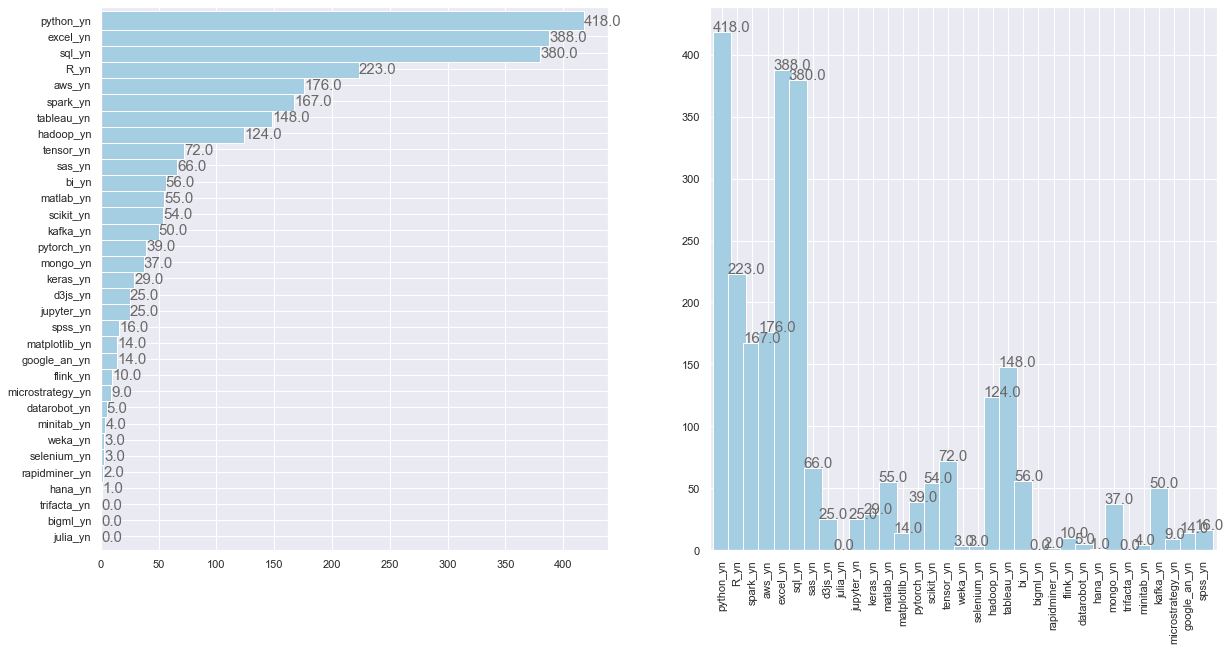

In [15]:
#Comparing quantity of each keyword considered.

#df.columns
list_yn = ['python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn',
       'sas_yn', 'd3js_yn', 'julia_yn', 'jupyter_yn', 'keras_yn', 'matlab_yn',
       'matplotlib_yn', 'pytorch_yn', 'scikit_yn', 'tensor_yn', 'weka_yn',
       'selenium_yn', 'hadoop_yn', 'tableau_yn', 'bi_yn', 'bigml_yn',
       'rapidminer_yn', 'flink_yn', 'datarobot_yn', 'hana_yn', 'mongo_yn',
       'trifacta_yn', 'minitab_yn', 'kafka_yn', 'microstrategy_yn',
       'google_an_yn', 'spss_yn']

#df[list_yn].apply(pd.value_counts)

# df[list_yn].hist(bins=2,figsize=(15,15), sharey=True)

# df[df[list_yn]>0][list_yn].hist(bins=1, figsize=(15,15), sharey=True)

df_list_yn=df[list_yn].apply(pd.value_counts)
df_list_yn_T = df_list_yn.T

# df_list_yn[1:].plot(kind='bar',rot=90,figsize=[20,10], width=2)
# plt.show()






f, axes = plt.subplots(1, 2, figsize=(15, 8))

ax2=df_list_yn_T[1].sort_values(ascending=True, na_position='first').plot(kind='barh',rot=0,figsize=[20,10], width=1.2, colormap='Paired', ax=axes[0])
ax1=df_list_yn_T[1].plot(kind='bar',rot=90,figsize=[20,10], width=1.2, colormap='Paired', ax=axes[1])

# set individual bar lables using above list
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=15,
                color='dimgrey')

for i in ax2.patches:
    ax2.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

plt.show()


# ###################################################
# Clearly Python, Excel, Sql are more reapeted.
# Seconds are: R, AWS, Spark, Tableau and Hadoop.
# ###################################################

# Average Salaries statistical calculations. In a rough heatmap.
## Each column contain the statistical calculations of average salaries, but each case filter those rows where there is no value in the named columns of our dataframe.
#### For example, In column python_yn I keep those rows where the word were found (1) and apply statistical calculation to the average salaries to these rows.

In [16]:
#Here I take only the rows that contain a determined keyword and applied .describe() respect de average salary column.
    #I mean, For example, I read the python_yn column and take just the rows where I have '1' (those who say 'python' in the job description)
    #then with those rows (in a new df) I apply function .describe() respect the avergae salary column
    #this is done with each keyword.
    
    #this means: for example, for the python_yn column I take the rows where there is a 1. With these rows .describe() calculates mean, min, max and percentiles.
    
    #Note: first column is calculated with all the rows in the original cleaned df.

#Function to assemble the describe df
def describe_to_df_in_avg_and_kw(dff, list_yn):
    df_listyn = dff[['avg_salary']].describe()
    for index, item in enumerate(list_yn):
        df_listyn['av_sal\n'+list_yn[index][:-3]] = dff[dff[list_yn[index]]>0]['avg_salary'].describe()
    return df_listyn   


df_describe_avg_kw = describe_to_df_in_avg_and_kw(df,list_yn)

#making the df a heatmap.
(df_describe_avg_kw.style.background_gradient(cmap='cubehelix',
                                              axis=None,
                                              vmin=0,
                                              vmax=240)
.highlight_null(null_color='#f1f1f1')
.format(precision=1)
)


#     #avg_slary and keywords estatistics comparison 
# plt.subplots(figsize=(20,10))
# # sns.color_palette("mako", as_cmap=True)
# sns.heatmap(df_describe_avg_kw, vmin=40, vmax=240,center=120,cmap="cubehelix",square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [17]:
#Here, just first row of the previous df is pulled out and color margins tweaked to a better differentiation.
#Comparing just means. The first one is the mean between tho whole list original df, the others are limited to the correspondient keyword.
    
    
(df_describe_avg_kw.loc[['mean']].style.background_gradient(cmap='rocket_r',
                                              axis=None,
                                              vmin=80,
                                              vmax=120)
.highlight_null(null_color='#f1f1f1')
.format(precision=1)
)
#Another way to do this:    #df[list_yn_salary].pivot() #BUT THIS FUNCTION IS SLOW
                            #pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')
    
    
    
# fig, ax = plt.subplots(figsize=(20,10))
# # sns.color_palette("mako", as_cmap=True)
# sns.heatmap(df_describe_avg_kw.loc[['mean']], vmin=80, vmax=120,center=99,cmap="rocket_r",square=True,linewidths=.5,cbar_kws={"shrink": .5})

# ###################################################
# It seems that Excel has low values while the others seems very average.
# ###################################################

# Keyword quantities relative to how often that amount is reapeted

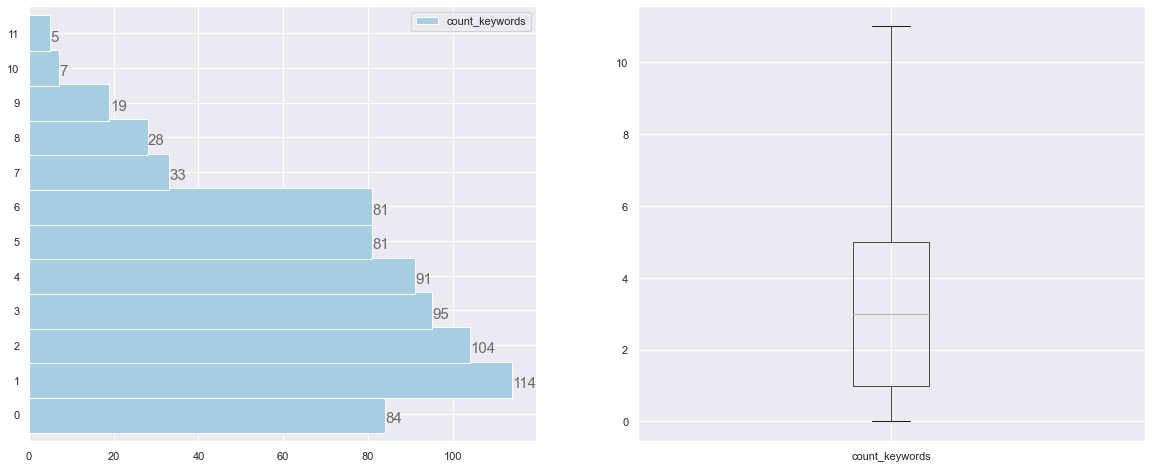

In [18]:
#Here, I do the inverse step. I take a row and count how many keywords are in the job description. Then, repeat for each row.
    #I want to compare how many times the keywords are labeled in each Job Description with the salaries. This can be considered as "while more especific the skill descripted is the salary better?"
    #firs I create a new column that count how many words are labeled in each Job Description.
df['count_keywords'] = df[list_yn].sum(axis=1)
df_count_keywords = pd.DataFrame(df['count_keywords'].value_counts().sort_values(ascending=False))
df_count_keywords

# df['count_keywords'].value_counts().sort_values(ascending=False).plot(kind='bar',rot=90,figsize=[15,15])
# plt.show()
# df.boxplot(column= ['count_keywords'])
# plt.show()
# df_list_yn=df[list_yn].apply(pd.value_counts)



f, axes = plt.subplots(1, 2, figsize=(20, 8))

#ax2=df_count_keywords.plot(kind='barh',rot=0, width=1.05, colormap='Paired', ax=axes[0])
ax2=df_count_keywords.sort_index().plot(kind='barh',rot=0, width=1.05, colormap='Paired', ax=axes[0])
ax1=df.boxplot(column= ['count_keywords'], ax=axes[1])

# set individual bar lables using above list
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=15,
                color='dimgrey')

for i in ax2.patches:
    ax2.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

plt.show()


# ###################################################
# Regularly it is asked for more than 5 skill (keywords) (quantile 75%)
# ###################################################

# Is there a correlation between amount of keywords and average salaries?

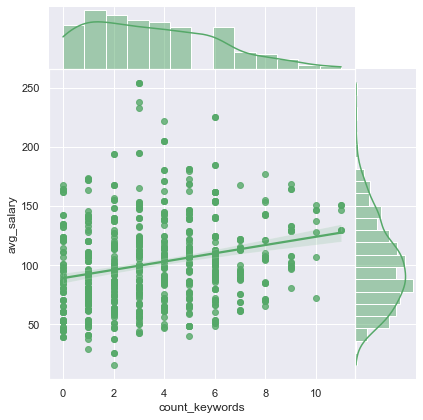

In [19]:
# df[df['python_yn']>0].plot.scatter(x='count_keywords', y='avg_salary')
# #At first, no correlation can be seen. (Naturally, we are working with a categorical variable and a numerical one)

sns.jointplot(x=df['count_keywords'], y=df['avg_salary'], kind="reg", space=0, color="g") #,x_jitter=.4)
plt.show()   

# ###################################################
# Looks like There is a poor correlation between salary amounts and  the quantity of keywords in the job descriptions.
# But, What happen if I take just the rows that have determined quantity of keywords and calclulate the mean between those avg_salary?
# ###################################################

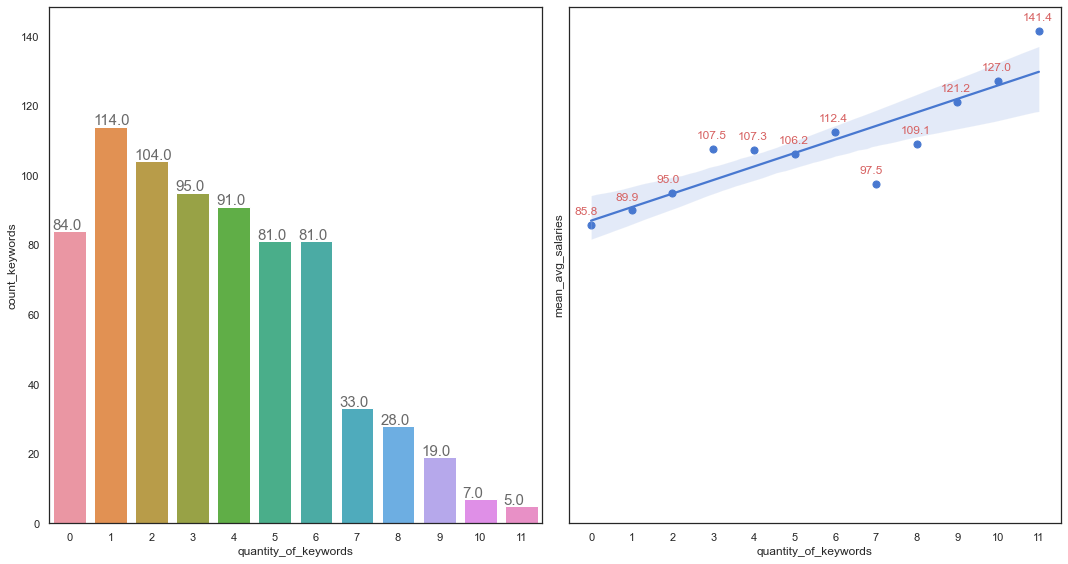

In [20]:
# What happen if I take just the rows that have 8 keywords and calclulate the average between those avg_salary?


df_mean_avg_salary = pd.DataFrame(df['count_keywords'].value_counts().sort_index())
df_mean_avg_salary = df_mean_avg_salary.reset_index().rename(columns={'index':'quantity_of_keywords'})

for i in df_mean_avg_salary['quantity_of_keywords']:
    df_mean_avg_salary.loc[[i],['mean_avg_salaries']] = df[df['count_keywords'] == i]['avg_salary'].mean()
    

# # Ploting
# ax2=df_mean_avg_salary.sort_index().plot(kind='barh',rot=0, width=1.05, colormap='Paired', figsize=(20, 8))
# plt.show()




sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# ax1 = sns.barplot(x=df_mean_avg_salary['quantity_of_keywords'], y=df_mean_avg_salary['count_keywords'], edgecolor=(1,0,0,1), lw=2, facecolor=(0,1,0,0.1), ax=axes[0])
# ax3 = sns.regplot(x=df_mean_avg_salary['quantity_of_keywords'], y=df_mean_avg_salary['mean_avg_salaries'], ax=axes[0])
# [ax3.text(p[0], p[1]+3, p[1], color='b') for p in zip(df_mean_avg_salary['quantity_of_keywords'], df_mean_avg_salary['mean_avg_salaries'].round(1))]
ax1 = sns.barplot(x=df_mean_avg_salary['quantity_of_keywords'], y=df_mean_avg_salary['count_keywords'], ax=axes[0])
ax2 = sns.regplot(x=df_mean_avg_salary['quantity_of_keywords'], y=df_mean_avg_salary['mean_avg_salaries'], x_estimator=np.mean, ax=axes[1])

ax2.set_xticks(df_mean_avg_salary['quantity_of_keywords'])# set individual x_stick labels (before it gives 0, 2, 4, 6...)
# set individual scatter labels 
[ax2.text(p[0]-.4, p[1]+3, p[1], color='r') for p in zip(df_mean_avg_salary['quantity_of_keywords'], df_mean_avg_salary['mean_avg_salaries'].round(1))]

# set individual bar labels 
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=15,
                color='dimgrey')
#     ax2.text(i.get_x()-.03, i.get_height()+.5, \
#             str(round((i.get_height()), 2)), fontsize=15,
#                 color='dimgrey')

plt.tight_layout()
plt.show()










# #Means for the salaries according to quantity of keywords
# kw_sal_pivot = pd.pivot_table(df, index = ['count_keywords'], values = 'avg_salary').sort_values(['count_keywords'],ascending=False)
#     #Looks like there is a correlation
# print(kw_sal_pivot)

# # kw_sal_pivot.plot(rot=90)
# # plt.show()


# #coarse  lineal regresion
# kw_sal_pivot = kw_sal_pivot.reset_index(drop=False)
# b, m = np.polynomial.polynomial.polyfit(kw_sal_pivot['count_keywords'], kw_sal_pivot['avg_salary'], 1)
# plt.plot(kw_sal_pivot['count_keywords'], kw_sal_pivot['avg_salary'], '.')
# plt.plot(kw_sal_pivot['count_keywords'], b + m * kw_sal_pivot['count_keywords'], '-')
# plt.show()

# # kw_sal_pivot.plot.scatter(x='count_keywords', y='avg_salary')

# ###################################################
# Clearly it can be seen a tendency in the average salaries: If the work ask for more key habilities the pay is better.
# ###################################################

# Pearson correlation & Heatmap
###   Average Salaries, Keywords

In [21]:
# #Correlating between keywords (point biserial correlation)
# df[list_yn].corr()
    
#     #Better to look it as a heatmap
# corr = df[list_yn].corr()
# corr.style.background_gradient(cmap='RdYlGn')

# # Fill diagonal and upper half with NaNs
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# corr[mask] = np.nan
# (corr
#  .style
#  .background_gradient(cmap='RdYlGn', axis=None, vmin=-.5, vmax=.5)
#  .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
#  .format(precision=3))

# # 'coolwarm', RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps
# # .set_properties(**{'font-size': '0pt'}) take out values

# # Time comparison
#     # In my testing, style.background_gradient() was 4x faster than plt.matshow() and 120x faster than sns.heatmap() with a 10x10 matrix. Unfortunately it doesn't scale as well as plt.matshow(): the two take about the same time for a 100x100 matrix, and plt.matshow() is 10x faster for a 1000x1000 matrix.
#     # https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas




#Correlation between Keywords and Average Salary (point biserial correlation)
    #here can be seen wich words group more aften.

# list_yn_salary = ['avg_salary']
# list_yn_salary.extend(list_yn)
# df[list_yn_salary].corr()

df[['avg_salary']+list_yn].corr()

    #Better to look it as a heatmap
corr = df[['avg_salary','count_keywords']+list_yn].corr()
corr.style.background_gradient(cmap='RdYlGn')

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='RdYlGn', axis=None, vmin=-.5, vmax=.5)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .format(precision=3))

### Correlation between average salaries and keywords sorted ascendingly

In [22]:
df_corr_as_kw = pd.DataFrame(df[['avg_salary']+list_yn].corr()['avg_salary'].sort_values(ascending = False))
df_corr_as_kw.T.style.background_gradient(cmap='RdYlGn',vmin=-.4, vmax=.4).highlight_null(null_color='#f1f1f1').format(precision=3)
#.abs()

# ###################################################
# Skill related to better Salaries (Descending order): Python, R, scikit, aws, spark and tensor.
# Conversely, lower paid skills are: Google, Tableo, Excel and SPSS.
# ###################################################

In [23]:
# ###               HEATMAPS

# #.corr________________________________________________________________________________
# df[list_yn].corr().style.background_gradient(cmap='RdYlGn',
#                                              vmin=-.5, vmax=.5
# #                                             axis=None
#                                             ).highlight_null(null_color='#f1f1f1').format(precision=3)
# #sns.heatmap________________________________________________________________________________
# fig, ax = plt.subplots(figsize=(30,20))
# cmap=sns.diverging_palette(220,10,as_cmap=True)
# sns.set(font_scale=1.2)
# sns.heatmap(
#     df[list_yn].corr(),
#     vmax=.3,
#     center=0.05,
#     cmap=cmap,
#     linewidths=.5,
#     cbar_kws={"shrink": .8},
# )
# #matshow________________________________________________________________________________
# f = plt.figure(figsize=(19, 15))
# plt.matshow(df[list_yn].corr(), fignum=f.number)
# plt.xticks(range(df[list_yn].select_dtypes(['number']).shape[1]), df[list_yn].select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df[list_yn].select_dtypes(['number']).shape[1]), df[list_yn].select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)
# #imshow________________________________________________________________________________
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=(30,20))
# plt.imshow(df[list_yn].corr(), cmap=plt.cm.Reds, interpolation='nearest')
# plt.colorbar()
# tick_marks = [i for i in range(len(df[list_yn].columns))]
# plt.xticks(tick_marks, df[list_yn].columns, rotation='vertical')
# plt.yticks(tick_marks, df[list_yn].columns)
# plt.show()
# #bokeh____________________________________________________________________________
# import bisect
# #
# from math import pi
# from numpy import arange
# from itertools import chain
# from collections import OrderedDict
# #
# from bokeh.palettes import RdBu as colors  # just make sure to import a palette that centers on white (-ish)
# from bokeh.models import ColorBar, LinearColorMapper

# colors = list(reversed(colors[9]))  # we want an odd number to ensure 0 correlation is a distinct color
# labels = df[list_yn].columns
# nlabels = len(labels)

# def get_bounds(n):
#     """Gets bounds for quads with n features"""
#     bottom = list(chain.from_iterable([[ii]*nlabels for ii in range(nlabels)]))
#     top = list(chain.from_iterable([[ii+1]*nlabels for ii in range(nlabels)]))
#     left = list(chain.from_iterable([list(range(nlabels)) for ii in range(nlabels)]))
#     right = list(chain.from_iterable([list(range(1,nlabels+1)) for ii in range(nlabels)]))
#     return top, bottom, left, right

# def get_colors(corr_array, colors):
#     """Aligns color values from palette with the correlation coefficient values"""
#     ccorr = arange(-1, 1, 1/(len(colors)/2))
#     color = []
#     for value in corr_array:
#         ind = bisect.bisect_left(ccorr, value)
#         color.append(colors[ind-1])
#     return color

# p = figure(plot_width=600, plot_height=600,
#            x_range=(0,nlabels), y_range=(0,nlabels),
#            title="Correlation Coefficient Heatmap (lighter is worse)",
#            toolbar_location=None, tools='')

# p.xgrid.grid_line_color = None
# p.ygrid.grid_line_color = None
# p.xaxis.major_label_orientation = pi/4
# p.yaxis.major_label_orientation = pi/4

# top, bottom, left, right = get_bounds(nlabels)  # creates sqaures for plot
# color_list = get_colors(df[list_yn].corr().values.flatten(), colors)

# p.quad(top=top, bottom=bottom, left=left,
#        right=right, line_color='white',
#        color=color_list)

# # Set ticks with labels
# ticks = [tick+0.5 for tick in list(range(nlabels))]
# tick_dict = OrderedDict([[tick, labels[ii]] for ii, tick in enumerate(ticks)])
# # Create the correct number of ticks for each axis 
# p.xaxis.ticker = ticks
# p.yaxis.ticker = ticks
# # Override the labels 
# p.xaxis.major_label_overrides = tick_dict
# p.yaxis.major_label_overrides = tick_dict

# # Setup color bar
# mapper = LinearColorMapper(palette=colors, low=-1, high=1)
# color_bar = ColorBar(color_mapper=mapper, location=(0, 0))
# p.add_layout(color_bar, 'right')

# show(p)

# Relation between amount of keywords and length of job descriptions visual
### Quantity of keywords mentioned and  Job Descriptions lenghts 

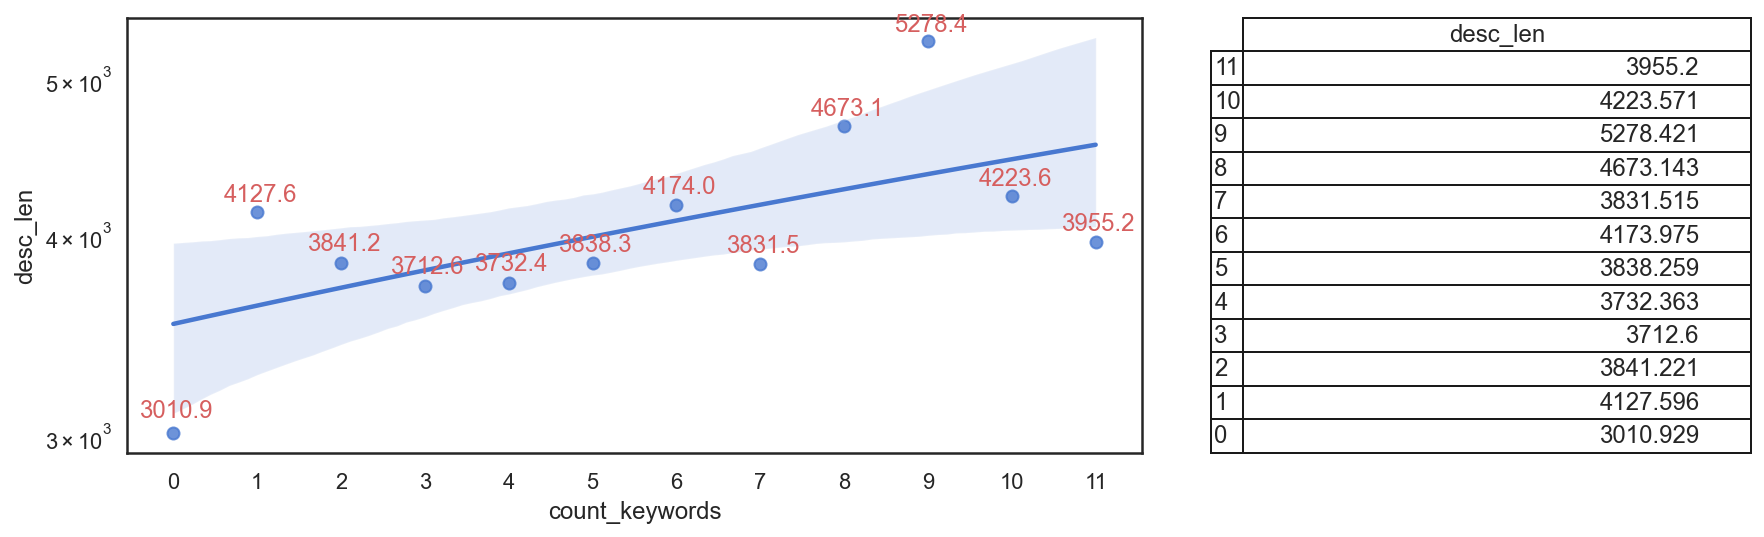

In [24]:
#Relation quantity of keywords with the mean of the job descriptions lenght: 
    #mean between length descriptions from each amount of keywords.
        #Are taken those rows with 11 keywords and calculated mean. It is the same for other keywords amounts.
df_pivot_cK_jd = pd.pivot_table(df, index = ['count_keywords'], values = 'desc_len').sort_values(['count_keywords'],ascending=False)



fig = plt.figure(figsize=(20,4),dpi=144)
ax = fig.add_subplot(1,2,1)
ax = sns.regplot(x=df_pivot_cK_jd.index, y=df_pivot_cK_jd['desc_len'])
ax.set_xticks(df_pivot_cK_jd.index)# set individual x_stick labels (before it gives 0, 2, 4, 6...)
[ax.text(p[0]-.4, p[1]+70, p[1], color='r') for p in zip(df_pivot_cK_jd.index, df_pivot_cK_jd['desc_len'].round(1))] # set individual scatter labels 

ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()

ax.table(cellText=df_pivot_cK_jd.values.round(3),
         rowLabels=df_pivot_cK_jd.index,
         colLabels=df_pivot_cK_jd.columns,
         loc='left',
         bbox=(1.1,0.0,0.5,1.0))

plt.show()

# Dividing df in quantiles and Obtaining frequencies: 
## count_keywords, desc_len, min, max, avg_salary

### **It is quite like traeting numerical variables like categorical ones. **

In [25]:
#Is the number of keywords equivalent to the lenght of the description?
    #In other words, if the lenght of the description is from the 3rd quantile, so is the number of keywords
    #This means that in this rows I'm talking about a job whose descriptions is between the longest and have the more mentioned keywords.
    
    
def kw_dl_same_quantile(dff,list_2_col,kw_dl_quant): #Comparing two columns in a row - quantile to quantile
    if dff[list_2_col[0]]>kw_dl_quant.at[0.75,list_2_col[0]] and dff[list_2_col[1]]>kw_dl_quant.at[0.75,list_2_col[1]]:
        return 1
    elif dff[list_2_col[0]]>kw_dl_quant.at[0.5,list_2_col[0]] and dff[list_2_col[0]]<=kw_dl_quant.at[0.75,list_2_col[0]] and dff[list_2_col[1]]>kw_dl_quant.at[0.5,list_2_col[1]] and dff[list_2_col[1]]<=kw_dl_quant.at[0.75,list_2_col[1]]:
        return 1
    elif dff[list_2_col[0]]>kw_dl_quant.at[0.25,list_2_col[0]] and dff[list_2_col[0]]<=kw_dl_quant.at[0.5,list_2_col[0]] and dff[list_2_col[1]]>kw_dl_quant.at[0.25,list_2_col[1]] and dff[list_2_col[1]]<=kw_dl_quant.at[0.5,list_2_col[1]]:
        return 1
    elif dff[list_2_col[0]]<kw_dl_quant.at[0.25,list_2_col[0]] and dff[list_2_col[1]]<kw_dl_quant.at[0.25,list_2_col[1]]:
        return 1
    else:
        return 0

def compare_2columns_rbr_quant(df_entry, list_two_col): #compare two columns row by row
    #First I define quantiles values
    kw_dl_quant = df[list_two_col].quantile([.25,.5,.75,1])
    
    #and run the previous function row to row.
    nkw_eq_nld = df_entry[list_two_col].apply(lambda x: kw_dl_same_quantile(x,list_two_col,kw_dl_quant),axis=1)
        
    #Counting how many rows meet the conditions.
    nkw_eq_nld.value_counts()
        #Note: A low quantity of equivalents means that there is no correlation between the quantity of the mentioned keywords and the lenght of the description

    #returning the probability to meet conditions (both colummns to the same percentile).
    return nkw_eq_nld.value_counts().at[1]/len(nkw_eq_nld)
    

### count_keywords vs desc_len


# I should delete this. why is this value significant? no reason.

In [26]:
#Comparing quantity of keywords with job descriptions lenght, row to row, quantile to quantile
    #"is the quantile in keywords quantity the same as te "
list_two_col = ['count_keywords','desc_len'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

#Here we take that just the 24% of the rows meet the conditions. This says that there is no direct correlation between both characteristics (lenght of job descriptions and quantity of keywords) or a poor one


0.25336927223719674

### SALARY (average, min and max) vs Job Descriptions lenght 

In [27]:
list_two_col = ['avg_salary','desc_len'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.3086253369272237

In [28]:
list_two_col = ['min_salary','desc_len'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.2991913746630728

In [29]:
list_two_col = ['max_salary','desc_len'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.29784366576819404

### Quantity of keywords mentioned and SALARY (average, min and max)

In [30]:
list_two_col = ['count_keywords','avg_salary'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.2560646900269542

In [31]:
list_two_col = ['count_keywords','min_salary'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.2668463611859838

In [32]:
list_two_col = ['count_keywords','max_salary'] #Here what I whant to compare line by line
compare_2columns_rbr_quant(df,list_two_col)

0.24663072776280323

# Just and only focus on Categorical variables:
### 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','job_state','job_simp', 'seniority'

# Plotting frequencies


graph for Size: total = 8


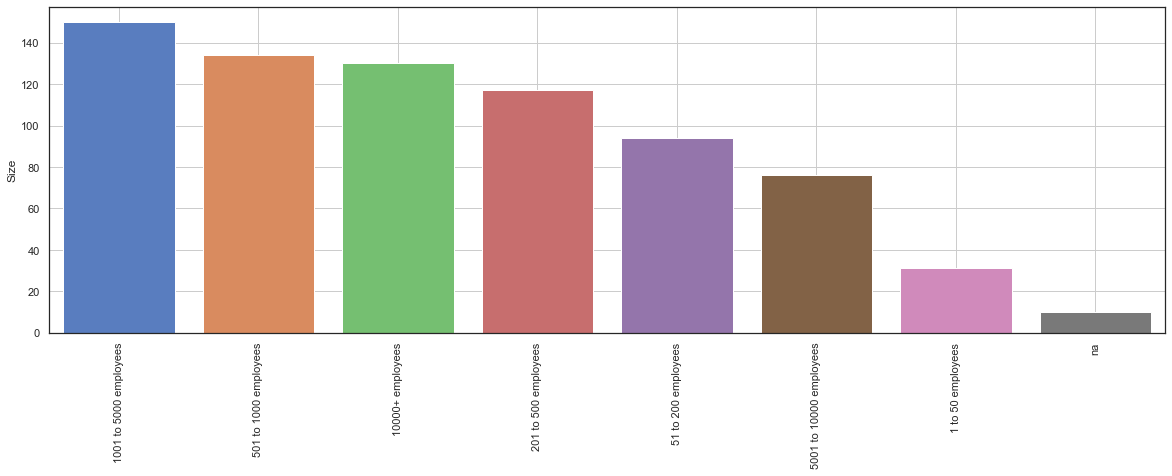

graph for Type of ownership: total = 9


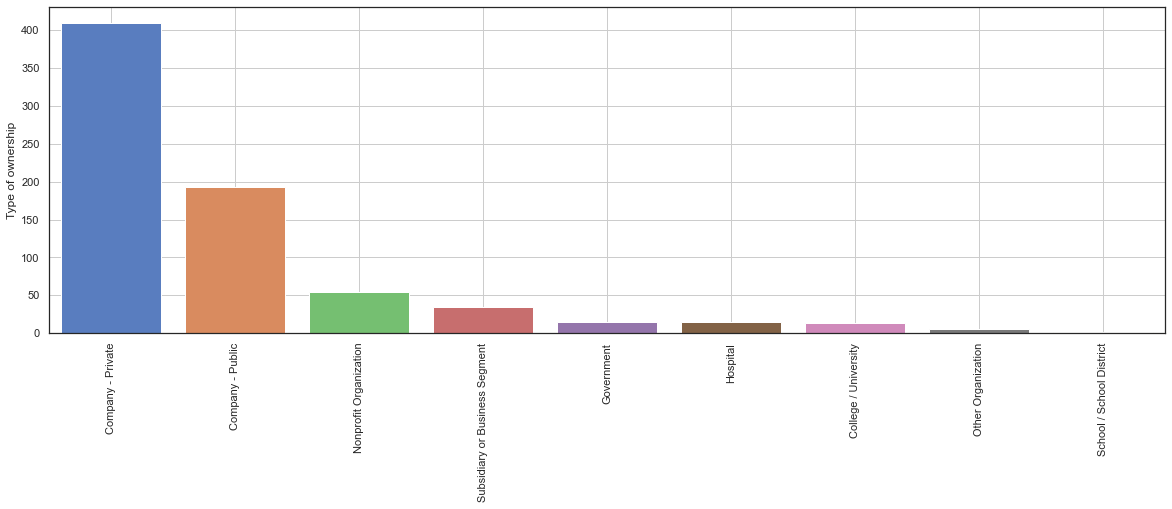

graph for Industry: total = 60


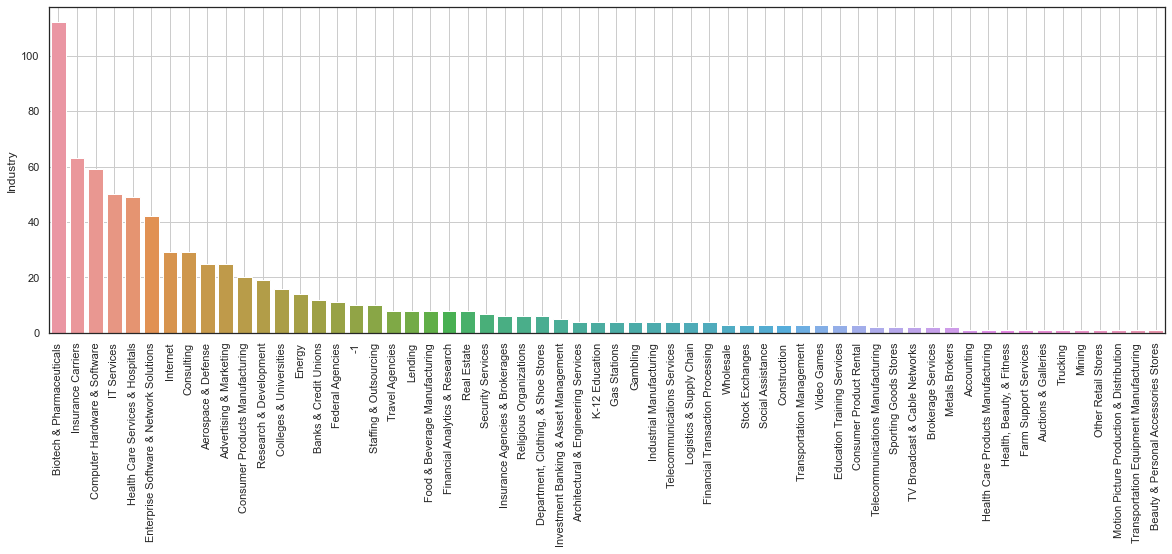

graph for Sector: total = 25


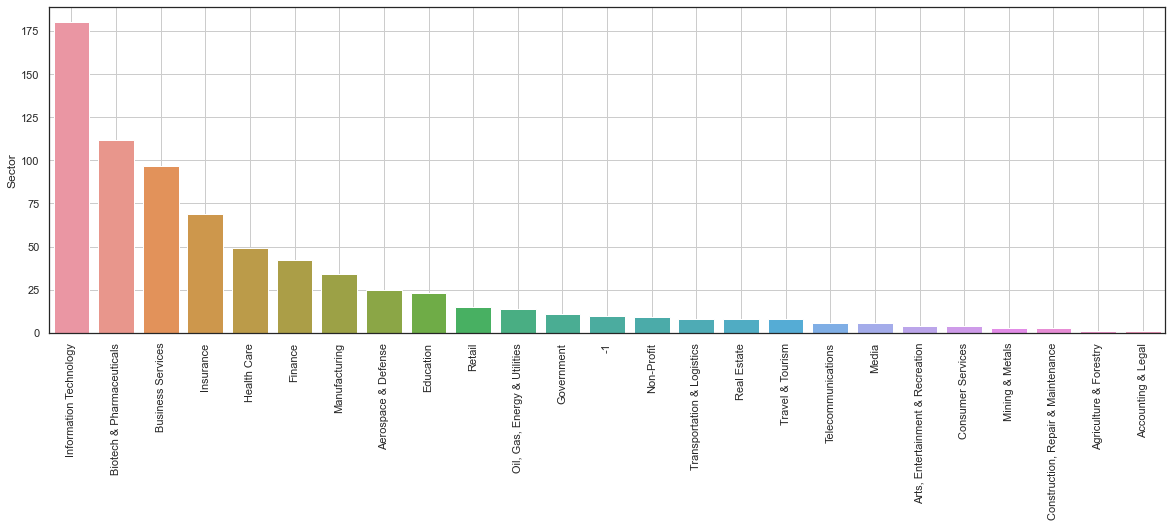

graph for Revenue: total = 13


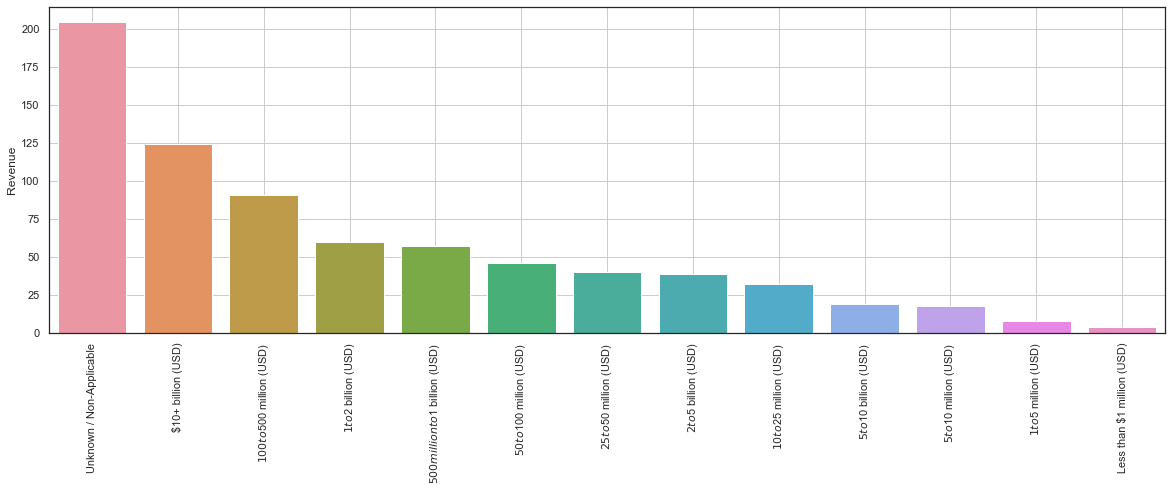

graph for job_state: total = 37


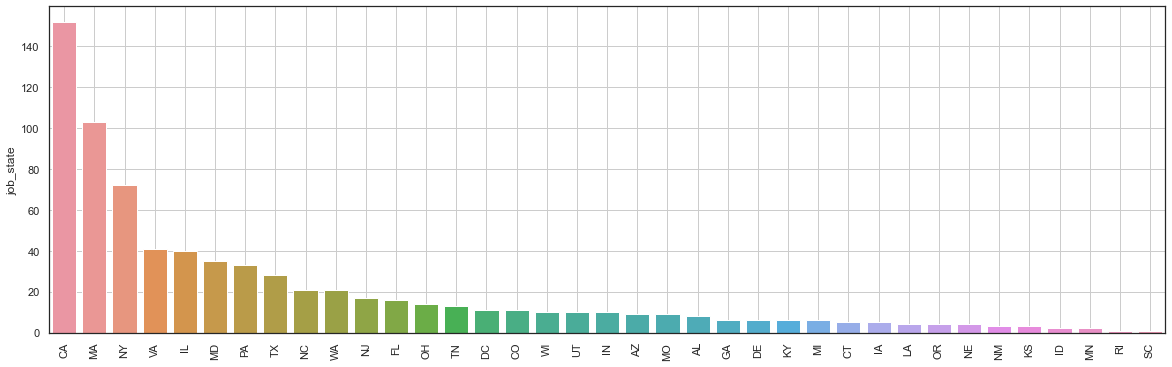

graph for job_simp: total = 10


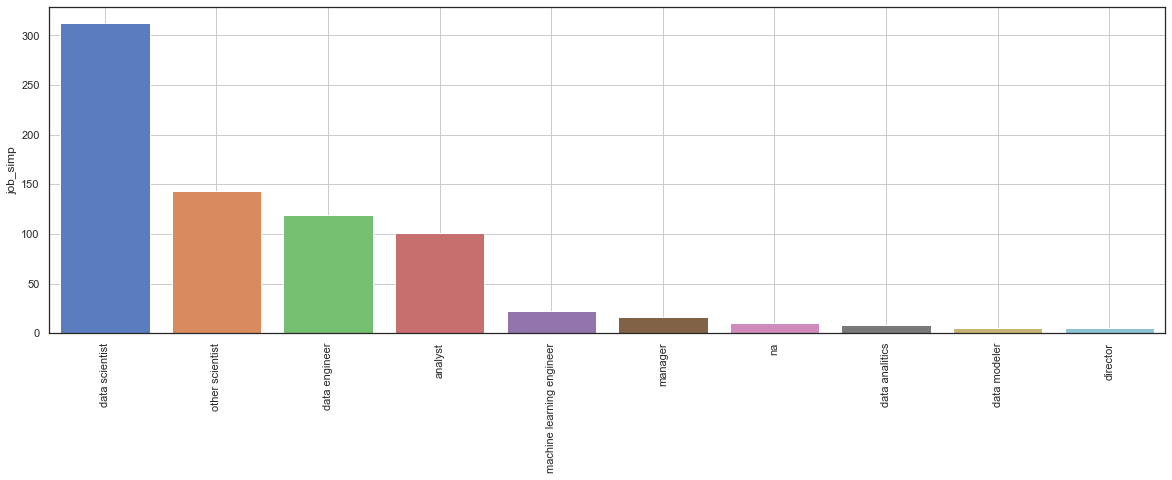

graph for seniority: total = 4


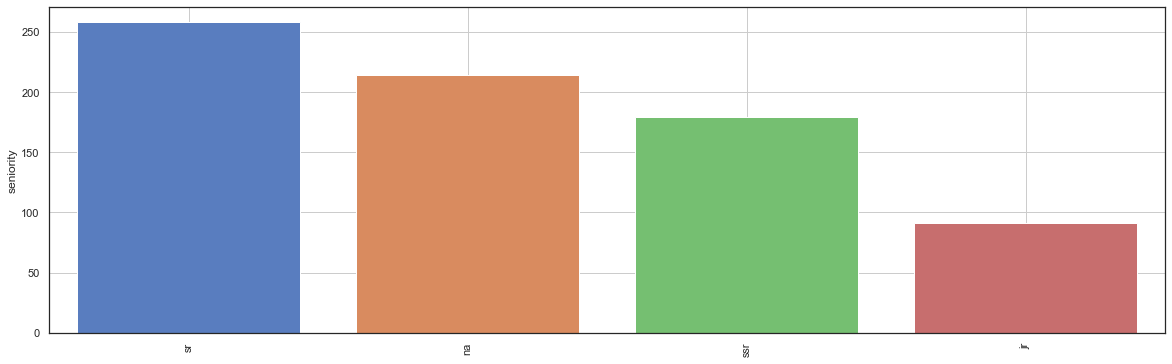

In [33]:
# df_cat = df[[ 'Location', 'Headquarters','Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','job_state','same_state','R_yn',
#        'spark_yn', 'aws_yn', 'excel_yn', 'py_yn', 'job_simp', 'seniority']]

# df_cat = df[[ 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','job_state','job_simp', 'seniority']]

df_cat = df[[ 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','job_state','job_simp', 'seniority']]



for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    fig, ax = plt.subplots(figsize=(20,6))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)    #label rotation
    plt.grid()
    plt.show()  

    
    
    
    
    
# # To get a closer look to highes scores:
# #for i in df_cat[['Location', 'Headquarters','company_txt']].columns:
# # for i in ['Location', 'Headquarters','company_txt']:

# for i in ['Industry', 'Sector','job_state']:    
#     cat_num=df[i].value_counts()[:20]    #this time, just the top 20 ([:20])
#     print("graph for %s: total = %d" % (i, len(cat_num)))
#     fig, ax = plt.subplots(figsize=(20,10))
#     chart = sns.barplot(x=cat_num.index,y=cat_num)
#     chart.set_xticklabels(chart.get_xticklabels(),rotation=90)    #label rotation
#     plt.grid()
#     plt.show()

# ###################################################
# Most significant values (more frequent values):
# Companies hiring more data professionals:
##    - size: companies with  `1001 to 5000 employees `.
##    - Type of ownership:  `Private `.
##    - Industry:  `Biotech and farmaceutics `.
##    - Sector:  `Information tecnology `.
##    - Revenue:  `10+ Billion (USD) `.
# The state that needs more data professionals:
##    - job_state:  companies in `CA (California) `.
# Theese  data professionals  are the more wanted:
##    - job_simp:  `Data Scientist `.
##    - seniority:  `Sr (Senior) `.
# ###################################################

# Plotting avg_salary vs categorical variables

graph for Size: total = 8


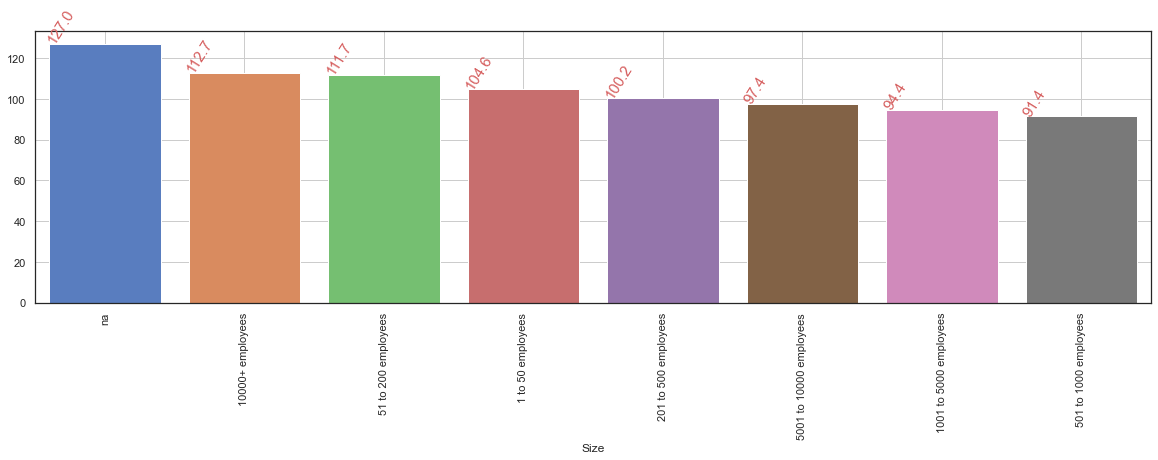

graph for Type of ownership: total = 9


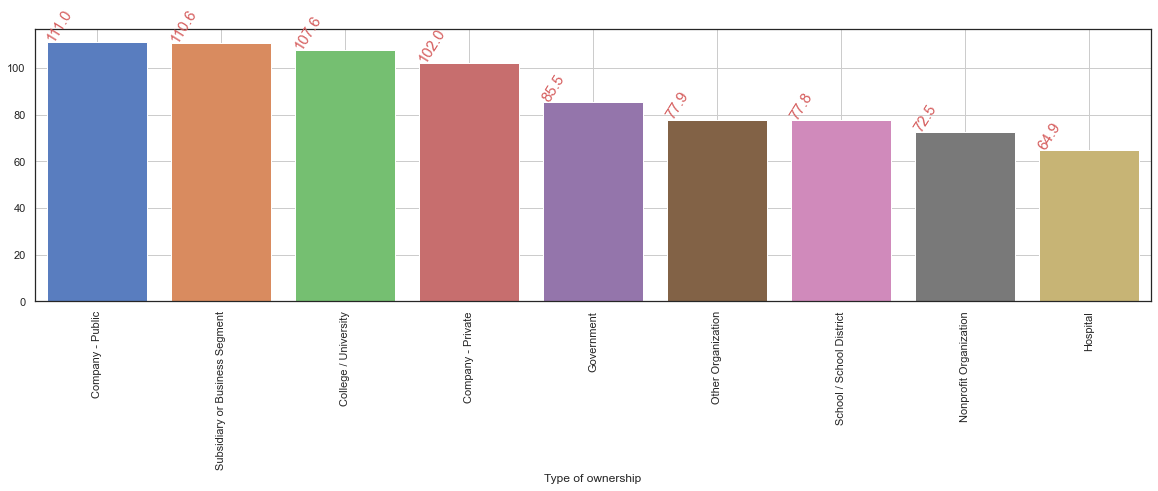

graph for Industry: total = 60


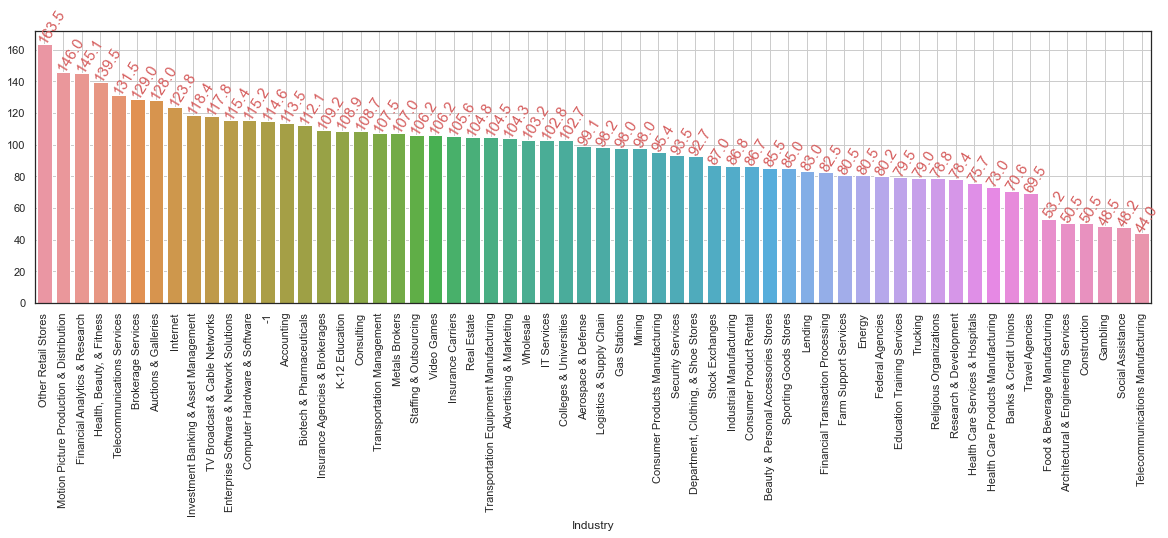

graph for Sector: total = 25


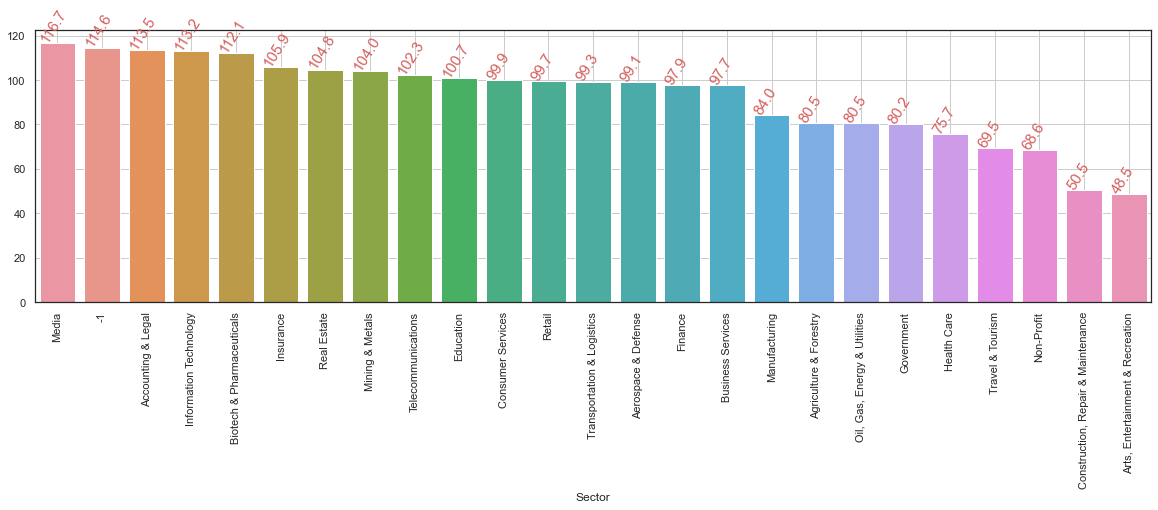

graph for Revenue: total = 13


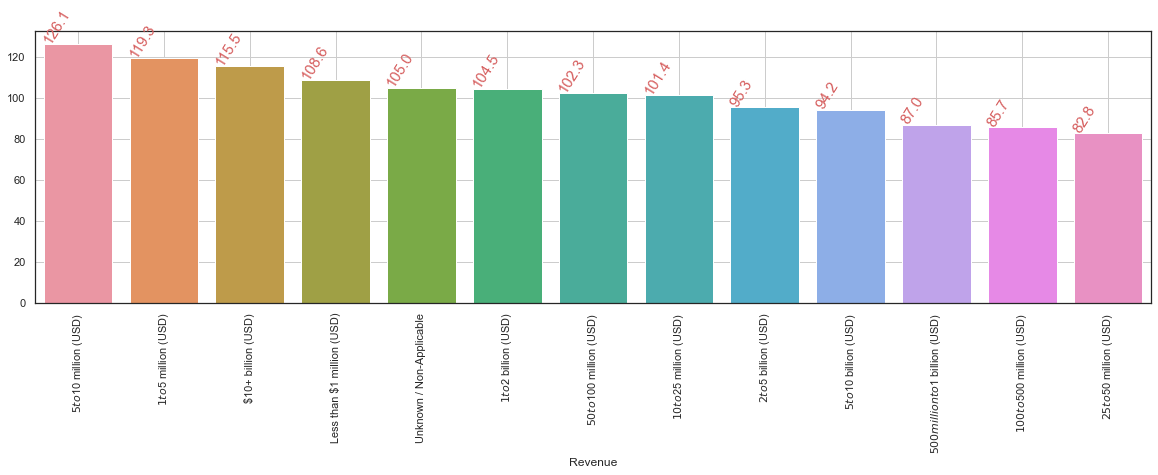

graph for job_state: total = 37


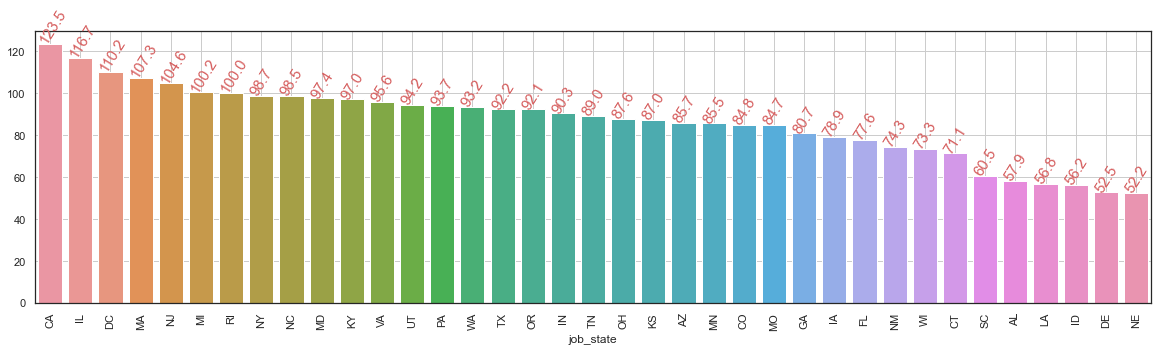

graph for job_simp: total = 10


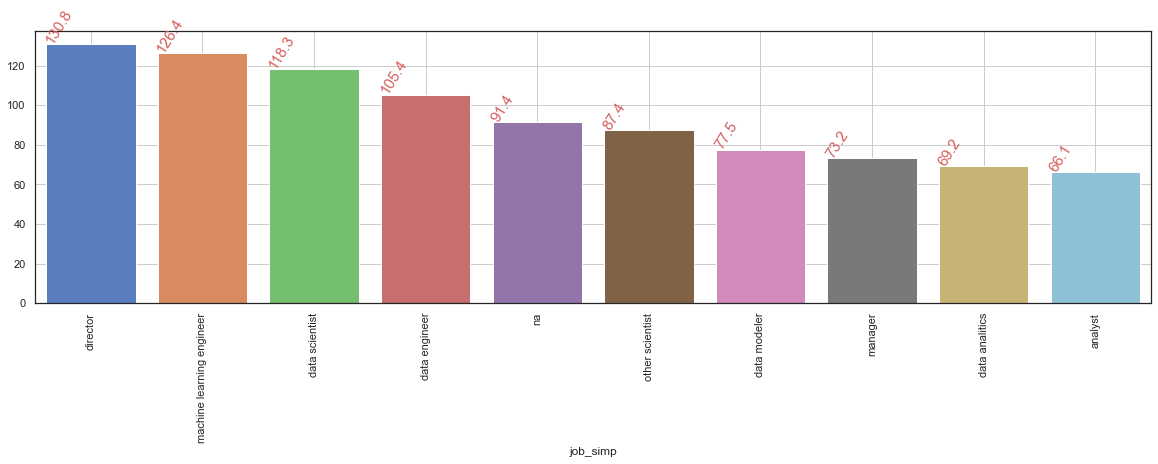

graph for seniority: total = 4


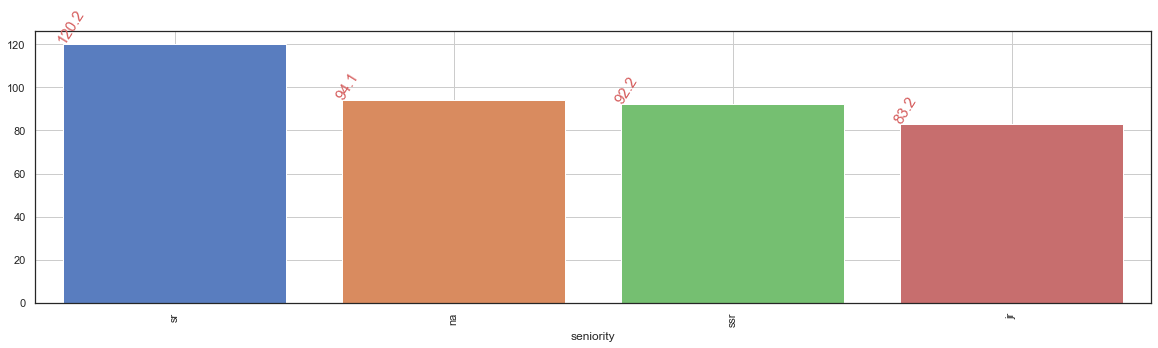

In [34]:
# pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')
for i in df_cat.columns:
    cat_num=pd.pivot_table(df, index = i, values = 'avg_salary').sort_values(by='avg_salary',ascending=False)
    print("graph for %s: total = %d" % (i, len(cat_num)))
    fig, ax = plt.subplots(figsize=(20,5))
    chart = sns.barplot(x=cat_num.index,y=cat_num.avg_salary.values)
    for j in chart.patches: chart.text(j.get_x()-.03, j.get_height()+.5, str(round((j.get_height()), 1)), fontsize=15, color='r', rotation=58) #labeling bars
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)    #label rotation
    plt.grid()
    plt.show()  

    
    
    
# pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary',ascending=False)


# ###################################################
# Better salaries affering (avg_salary)):
# Companies offering Better Salaries to data professionals:
##    - size: companies with  `+10000 employees `.
##    - Type of ownership:  `Public `.
##    - Industry:  `Motion Picture Production and Distribution`.
##    - Sector:  `Media`.
##    - Revenue:  `5 to 10 Millions (USD) `.
# The state gives better salaries:
##    - job_state:  companies in `CA (California) `.
# Theese  data professionals get the better salaries:
##    - job_simp:  `Directors`.
##    - seniority:  `Sr (Senior) `.
# ###################################################

# Data professionals data related and Seniority vs Salaries

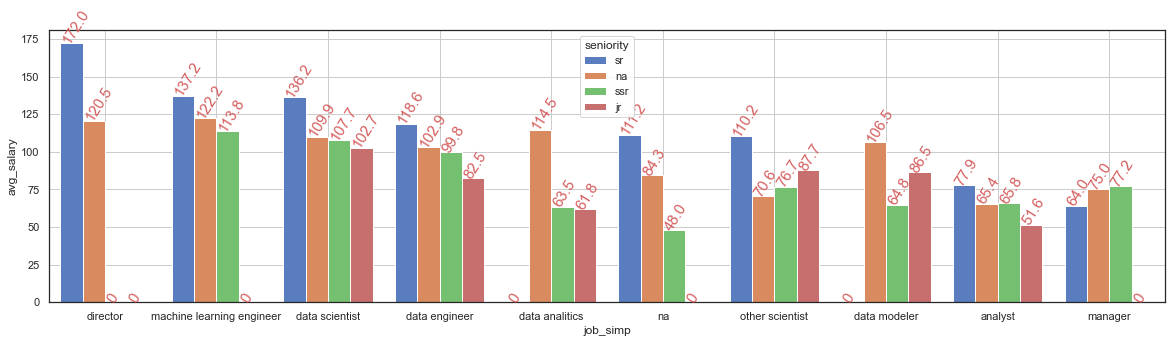

In [35]:
# pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

#plot size
plt.subplots(figsize=(20,5))
# pivot df
cat_num = pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary').sort_values(by='avg_salary',ascending=False)
# sns barplot
chart = sns.barplot(data = cat_num.reset_index(), x = 'job_simp', y = 'avg_salary', hue = 'seniority')
# adding labels
for j in chart.patches: 
    y_for  = j.get_height()
    if np.isnan(y_for): y_for = 0     #This if solve error message "posx and posy should be finite values". The cause is that j.get_height() take NaN value sometimes.
    chart.text(j.get_x(), y_for, str(round((y_for), 1)), fontsize=15, color='r', rotation=58) #labeling bars
# plotting grid
plt.grid()
plt.show()  





# # Here can be seen the data above, but discriminated by those who are asking python and those who don't do.
# #     But, It does not give a clear diferentiated information. Some salaries asking python are higher and some are lower.

# # pd.pivot_table(df, index = ['job_simp','seniority','python_yn'], values = 'avg_salary')

# plt.subplots(figsize=(20,5))
# cat_num = pd.pivot_table(df, index = ['job_simp','seniority','python_yn'], values = 'avg_salary').sort_values(by='avg_salary',ascending=False)
# chart = sns.barplot(data = cat_num.reset_index(), x = 'job_simp', y = 'avg_salary', hue = 'seniority')
# for j in chart.patches: 
#     y_for  = j.get_height()
#     if np.isnan(y_for): y_for = 0     #This "if" solve error message "posx and posy should be finite values". The cause is that j.get_height() take NaN values sometimes.
#     chart.text(j.get_x(), y_for, str(round((y_for), 1)), fontsize=15, color='r', rotation=58) #labeling bars
# plt.grid()
# plt.show()  

# ###################################################
# Can be apreciated perfectly how  `Directors` get the better salaries, followed by `Machine Learning Engineers` and `Data Scientist`.
# Ovbiously `Seniors` are before `Semi-Seniors` and `Junior`.
# ###################################################

# Quick look to how Salaries are influenced by States (beneath the Jobs possitions) 

In [36]:
pd.set_option('display.max_rows', None) #display every column

# First row of the table
df_pv_jsi_jst_as = pd.pivot_table(df, index = ['job_simp','job_state'], values = 'avg_salary') \
            .sort_values(['job_simp','avg_salary'],ascending=False) \
            .T
            #.style.bar()
# Second row of the table
df_pv_jsi_jst_count = pd.pivot_table(df, index = ['job_simp','job_state'], values = 'avg_salary', aggfunc='count')\
                    .sort_values(['job_simp','avg_salary'], ascending=False)\
                    .T
# Re-naming second row.
df_pv_jsi_jst_count = df_pv_jsi_jst_count.T.rename({'avg_salary':'avg_salary_count'},axis=1).T
# Appending rows and reordering
df_pv_jsi_jst_as_c = df_pv_jsi_jst_as.append(df_pv_jsi_jst_count)#, ignore_index=True)
df_pv_jsi_jst_as_c = df_pv_jsi_jst_as_c.T.sort_values(['job_simp','avg_salary'], ascending = False).T
    
# Creating a dictionary to add columns dividing lines to the table below
lines_format = [{'selector': 'th', 'props': 'border-left: 1px solid black'},{'selector': 'td', 'props': 'border-left: 1px solid #000066'}]
str_temp=""
dic_lines={}
for col in df_pv_jsi_jst_as_c.columns:
    if col[0] != str_temp: 
        dic_lines[col] = (lines_format)
    str_temp=col[0]
    
# Adding colors, and other formats.
cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) #"light:#5A9","ch:s=.25,rot=-.25", "flare",'RdYlGn', 'cubehelix','Spectral'  # cmap=sns.diverging_palette(-10300,35510,as_cmap=True)
styles_pv_jsi_jst_as_c = df_pv_jsi_jst_as_c.style.background_gradient(cmap=cmap,vmin=-5, vmax=150) \
                            .highlight_null(null_color='#f1f1f1') \
                            .format(precision=1) \
                            .set_table_styles(dic_lines, overwrite=False, axis=0)
            
styles_pv_jsi_jst_as_c



# The plot does not say anything (bad legibility)
# plt.subplots(figsize=(20,5))
# cat_num = pd.pivot_table(df, index = ['job_simp','job_state'], values = 'avg_salary').sort_values(['job_simp','avg_salary'],ascending=False)
# chart = sns.barplot(data = cat_num.reset_index(), x = 'job_state', y = 'avg_salary', hue = 'job_simp')
# for j in chart.patches: 
#     y_for  = j.get_height()
#     if np.isnan(y_for): y_for = 0     #This "if" solve error message "posx and posy should be finite values". The cause is that j.get_height() take NaN values sometimes.
#     chart.text(j.get_x(), y_for, str(round((y_for), 1)), fontsize=15, color='r', rotation=58) #labeling bars
# plt.grid()
# plt.show()  



# ###################################################
# Here, can be seen a clear differentiation of the salaries for different kind of data professionals (even divided by `states`).
# For example, Data Scientist salaries are all green.
# ###################################################

# Quick look to how Salaries are influenced by Jobs possitions (beneath the States) 

In [37]:
# First row of the table
df_pv_jst_jsi_as = pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary')\
                 .sort_values(['job_state','avg_salary'], ascending=[True, False])\
                 .T
# Second row of the table
df_pv_jst_jsi_count = pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc='count')\
                    .sort_values(['job_state','avg_salary'], ascending=[True, False])\
                    .T
# Re-naming second row.
df_pv_jst_jsi_count = df_pv_jst_jsi_count.T.rename({'avg_salary':'avg_salary_count'},axis=1).T

# Appending rows and reordering
df_pv_jst_jsi_as_c = df_pv_jst_jsi_as.append(df_pv_jst_jsi_count)#, ignore_index=True)
df_pv_jst_jsi_as_c_T = df_pv_jst_jsi_as_c.T.sort_values(['job_state','avg_salary'], ascending = [True, False])

# Creating a df of amount of offers by country.
df_pv_jst_count = pd.pivot_table(df, index = ['job_state'], values = 'avg_salary', aggfunc='count').sort_values('job_state',ascending=True).T   #df of amount offers by states.
df_pv_jst_as = pd.pivot_table(df, index = ['job_state'], values = 'avg_salary').sort_values('job_state',ascending=True).T    #df of salary means by country.

# Creating a list of amount of offers by country with a lenght equal to the final df.
list_col_pv = []
for i in df_pv_jst_count:
    for j in df_pv_jst_jsi_count.T.index:
        if i == j[0]:
            list_col_pv.append(df_pv_jst_count[i][0])
# Creating a list of amount of offers by country with a lenght equal to the final df.
list_col_pv_as = []
for i in df_pv_jst_as:
    for j in df_pv_jst_jsi_count.T.index:
        if i == j[0]:
            list_col_pv_as.append(df_pv_jst_as[i][0])

# appending list to df as 'count_states' .
df_pv_jst_jsi_as_c_T['count_by_states'] = list_col_pv
df_pv_jst_jsi_as_c_T['avg_salaries_by_states'] = list_col_pv_as
df_pv_jst_jsi_as_c_stC = df_pv_jst_jsi_as_c_T.sort_values(['count_by_states','avg_salary'], ascending=False).T

# Creating a dictionary to add columns dividing lines to the table below
lines_format = [{'selector': 'th', 'props': 'border-left: 1px solid black'},{'selector': 'td', 'props': 'border-left: 1px solid #000066'}]
str_temp=""
dic_lines={}
for col in df_pv_jst_jsi_as_c_stC.columns:
    if col[0] != str_temp: 
        dic_lines[col] = (lines_format)
    str_temp=col[0]
    
# Adding colors, and other formats.
# indexes = pd.IndexSlice[[df_pv_jst_jsi_as_c_stC.index[0],df_pv_jst_jsi_as_c_stC.last_valid_index()], :] #subset=(df_pv_jst_jsi_as_c_stC.index[0], df_pv_jst_jsi_as_c_stC.select_dtypes(float).columns)
cmap = sns.color_palette("flare", as_cmap=True) #"light:#5A9","ch:s=.25,rot=-.25", "flare",'RdYlGn', 'cubehelix','Spectral'  # cmap=sns.diverging_palette(-10300,35510,as_cmap=True)
styles_pv_jst_jsi_as_c_stC = df_pv_jst_jsi_as_c_stC.style.background_gradient(cmap=cmap,vmin=-5, vmax=150, subset=(df_pv_jst_jsi_as_c_stC.index[0], df_pv_jst_jsi_as_c_stC.select_dtypes(float).columns)) \
                            .background_gradient(cmap='Greys',vmin=1, vmax=150, subset=(df_pv_jst_jsi_as_c_stC.index[2], df_pv_jst_jsi_as_c_stC.select_dtypes(float).columns)) \
                            .highlight_null(null_color='#f1f1f1') \
                            .format(precision=1) \
                            .set_table_styles(dic_lines, overwrite=False, axis=0)
styles_pv_jst_jsi_as_c_stC

# ###################################################
# `States` with more varied offers (and mainly better salaries): 
* Firts: CA and MA. 
* Second: NY, IL, MD, PA and VA

# ###################################################

# "DATA SCIENTIST" Salaries by STATES

In [38]:
# df of data scientist salaries by States
cmap = sns.light_palette("green", as_cmap=True)
df_DS_s_st = pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary')\
               .sort_values('job_state',ascending=True)
# adding amount of offersof data scientist by States
df_DS_s_st['amount_of_offers'] = pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary', aggfunc='count')\
               .sort_values('job_state',ascending=True).values
# giving colors to table
df_DS_s_st = df_DS_s_st.sort_values('avg_salary', ascending=False).T
df_DS_s_st.style.format(precision=2).background_gradient(cmap=cmap,vmin=40, vmax=140, subset=(df_DS_s_st.index[0], df_DS_s_st.select_dtypes(float).columns))\
                                                                                 .background_gradient(cmap=cmap,vmin=1, vmax=80, subset=(df_DS_s_st.index[1], df_DS_s_st.select_dtypes(float).columns))

# ###################################################
# `States` where `Data Scientist` gain more are DC, IL, CA and UT, but except CA they have got les offers.
# But match more or less the same states where other Data professionals gain better salaries (previous table).
# 
# Other thing we can see is that most of the salaries are higher than 90k.

# ###################################################

# Reggression plot:
# Rating  vs  Salaries
# Job description lengths  vs  Salaries

In [39]:
# list_pivots = ['Rating','Industry', 'Sector', 'Revenue','hourly','employer_provided','Type of ownership','avg_salary']
# for i in list_pivots[:-1]:
#     print(i)
#     print(pd.pivot_table(df[list_pivots], index=i,values='avg_salary').sort_values('avg_salary',ascending=False))
 


df_cat = df[['Rating', 'desc_len']]
for i in df_cat.columns:
    # df 
    cat_num = pd.pivot_table(df[df[i]!=-1], index = [i], values = 'avg_salary').sort_values(by='avg_salary',ascending=False)
    # reggression plot
    chart = px.scatter(cat_num.reset_index(), x = i, y = 'avg_salary', trendline="ols")
    chart.show()

# ###################################################
# First linear regression plot shows that the trend of average salaries increase as Ranking companies are higher.
# In the second case, the sparcity of point is clear, but still there is a little correlation.
# ###################################################

# A clear representetion of keywords mentioned for each data posittion

In [40]:
rev_yn = pd.pivot_table(df, index = 'job_simp',columns = 'python_yn',values='avg_salary',aggfunc='count').sort_values('job_simp',ascending=True)
for i in list_yn:#[-1:]:
    rev_yn_ = pd.pivot_table(df, index = 'job_simp',columns = i,values='avg_salary',aggfunc='count').sort_values('job_simp',ascending=True)
    if 1 in rev_yn_.columns:
        rev_yn[i] = rev_yn_[1]
rev_yn

rev_yn = rev_yn.drop(1, axis=1)
rev_yn = rev_yn.drop(0, axis=1)


cmap = sns.color_palette("flare", as_cmap=True) #"light:#5A9","ch:s=.25,rot=-.25", "flare",'RdYlGn', 'cubehelix','Spectral'  # cmap=sns.diverging_palette(-10300,35510,as_cmap=True)
rev_yn.style.background_gradient(cmap=cmap,vmin=1, vmax=150).highlight_null(null_color='#f1f1f1').format(precision=0)

#pd.pivot_table(df, index = 'Revenue',columns = 'python_yn',values='avg_salary',aggfunc='count')





# ###################################################
# Data scientist is the one with more keywords, but it is logical, thinking that it is the job with more offers.
# But it is interestig to see maching learning eangineers. That it is less mentioned, but has many different keywords.
# Alike six first keywords are more frequent in all data professions.

# ###################################################

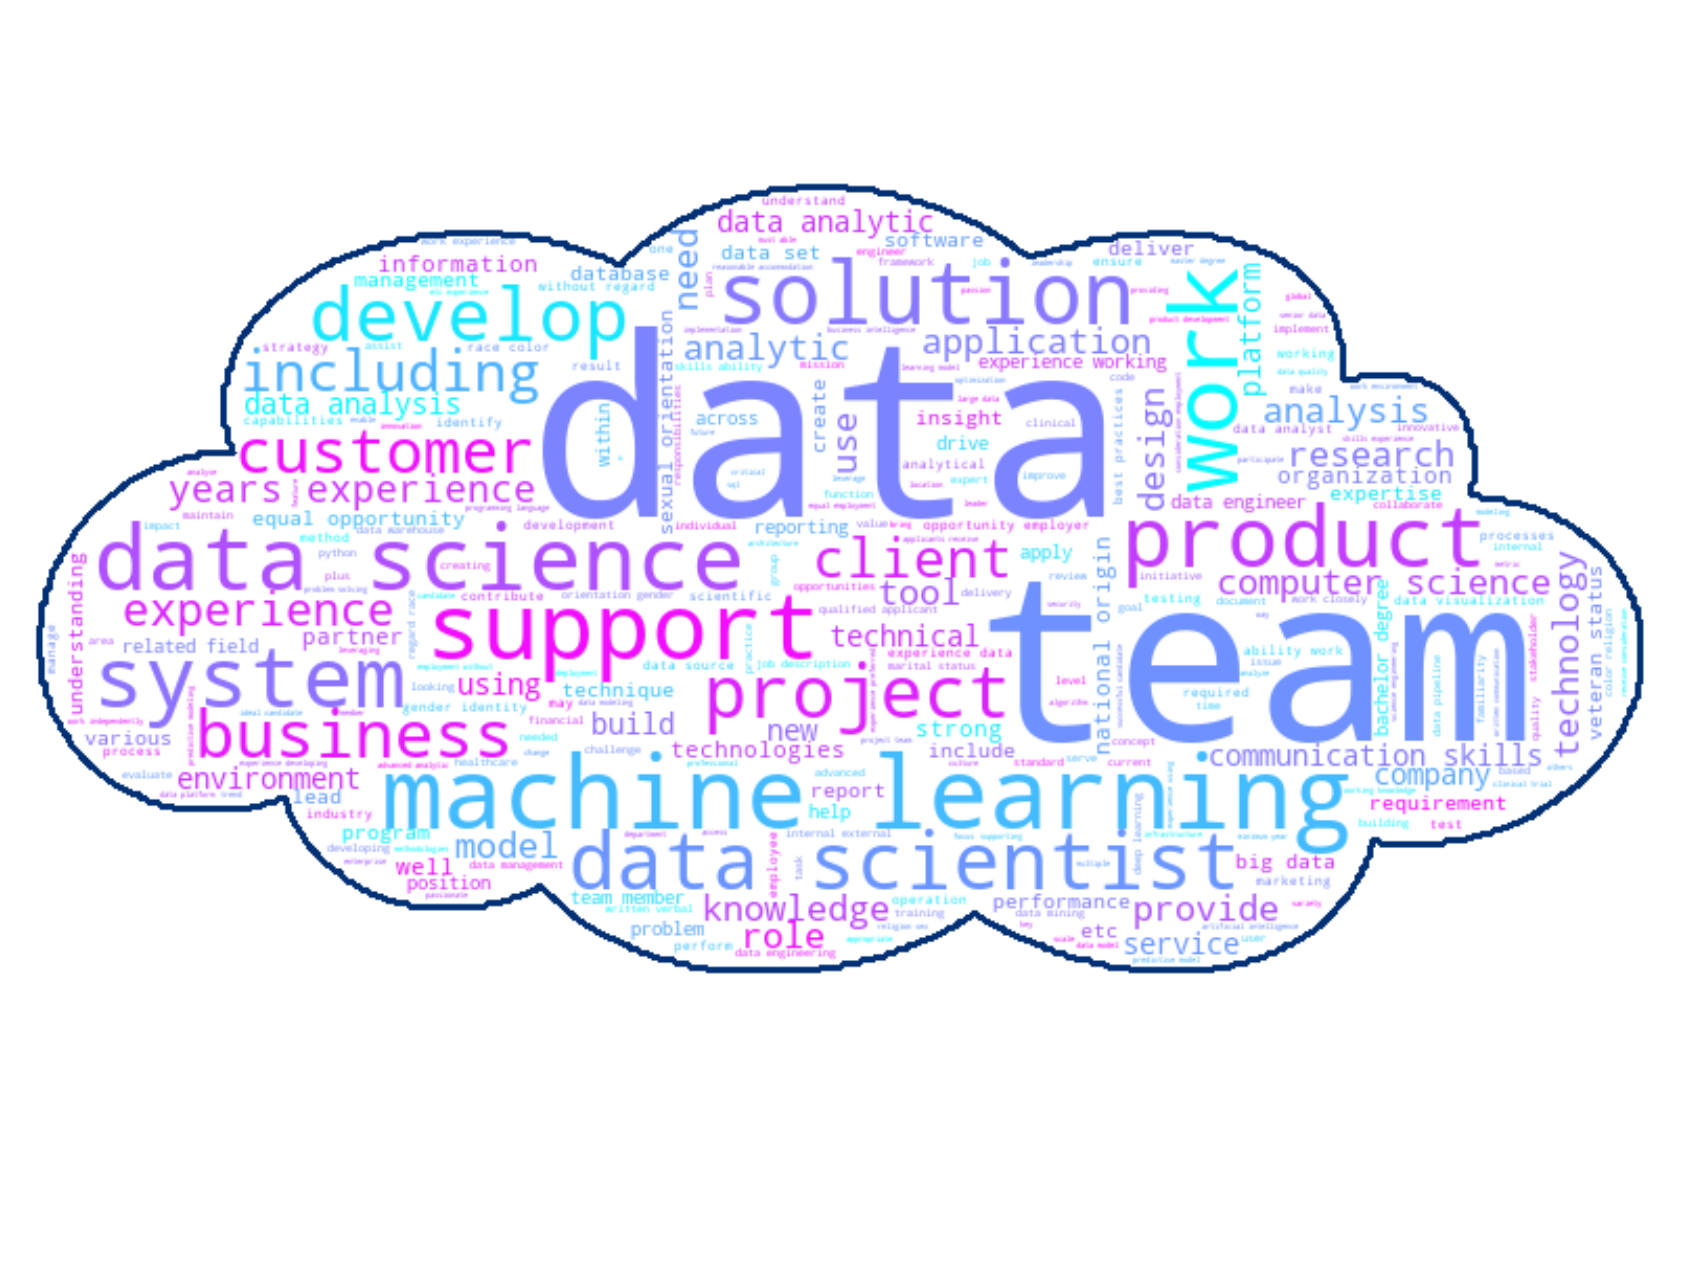

In [43]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

# wordcloud contour shape
set_stopwords = set(STOPWORDS)
mask = np.array(Image.open("./image.png"))

wc= WordCloud(stopwords=set_stopwords,
              background_color="white", 
              colormap='cool', # cool, Dark2, Paired, tab20, gist_earth, brg, (mainly without yellow with a white backround)
              max_words = 1500, 
              width =800, height = 1500,
              mask=mask, 
              contour_width=3,
              contour_color='#023075', #'firebrick'
              random_state=1)
# wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[30,30])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
df_out=df
df_out.to_csv('data_eda_2020.csv',index=False)
#df_out.to_csv('data_eda_2021.csv',index=False)
